2024-07-07 21:56:46.898794: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 21:56:46.898895: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 21:56:47.023127: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Setup successful!
Number of elements =  55692
../input/waste-dataset-zipped/Waste Classification Dataset/waste_dataset/organic/organic_002405_photo.jpg


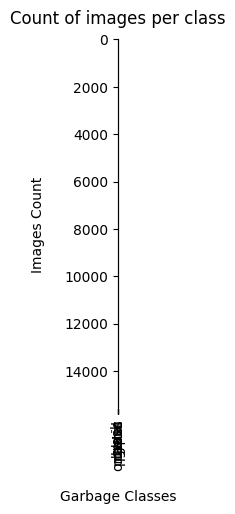

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ (None, 320, 320, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 10, 10, 1280)   │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         7,686 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,057,257 (15.48 MB)

 Trainable params: 7,686 (30.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

Callbacks defined!
Train size = 44553 Validate size = 5569 Test size = 5570
Found 44553 validated image filenames belonging to 6 classes.
Found 5569 validated image filenames belonging to 6 classes.
Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/696 ━━━━━━━━━━━━━━━━━━━━ 8:02:42 42s/step - categorical_accuracy: 0.2656 - loss: 1.8000

I0000 00:00:1720389512.604898     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


696/696 ━━━━━━━━━━━━━━━━━━━━ 445s 580ms/step - categorical_accuracy: 0.8093 - loss: 0.5925 - val_categorical_accuracy: 0.9143 - val_loss: 0.2641
Epoch 2/20
  1/696 ━━━━━━━━━━━━━━━━━━━━ 1:06 96ms/step - categorical_accuracy: 0.9219 - loss: 0.2983

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


696/696 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - categorical_accuracy: 0.9219 - loss: 0.2983 - val_categorical_accuracy: 1.0000 - val_loss: 0.0041
Epoch 3/20
696/696 ━━━━━━━━━━━━━━━━━━━━ 229s 327ms/step - categorical_accuracy: 0.9116 - loss: 0.2747 - val_categorical_accuracy: 0.9280 - val_loss: 0.2202
Epoch 4/20
696/696 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - categorical_accuracy: 0.9844 - loss: 0.1324 - val_categorical_accuracy: 1.0000 - val_loss: 0.0572
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 2.


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras
import tensorflow as tf
import re
from PIL import Image
from keras.layers import Input, Dense, Flatten, GlobalAveragePooling2D, Lambda
from keras.models import Sequential
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from keras.saving import register_keras_serializable
from keras.applications import EfficientNetB0  # Import EfficientNet model

print('Setup successful!')

# Define constants
IMAGE_WIDTH = 320    
IMAGE_HEIGHT = 320
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3

# Define the categories
categories = {0: 'paper', 1: 'plastic', 2: 'metal', 3: 'glass', 4: 'organic', 5: 'trash'}

# Define class mappings for each dataset
class_maps = {
    "garbage_classification_12_classes": {
        'paper': 'paper', 'cardboard': 'paper', 'plastic': 'plastic', 'metal': 'metal',
        'brown-glass': 'glass', 'green-glass': 'glass', 'white-glass': 'glass',
        'biological': 'organic', 'clothes': 'trash', 'shoes': 'trash', 'battery': 'trash', 'trash': 'trash'
    },
  
    "garbage_classification_v2": {
        'paper': 'paper', 'cardboard': 'paper', 'plastic': 'plastic', 'metal': 'metal', 'glass': 'glass'
    },
    "trashbox_limited": {
        'paper': 'paper', 'cardboard': 'paper', 'plastic': 'plastic', 'metal': 'metal', 'glass': 'glass'
    },
    "trashnet":{
        'cardboard':'paper','glass':'glass','metal':'metal','paper':'paper','plastic':'plastic'
    },
    "waste_dataset": {
        'organic': 'organic'
    }
}
# Define paths to datasets
dataset_paths = {
    "garbage_classification_12_classes": "../input/garbage-classification/garbage_classification/",  
    "garbage_classification_v2": "../input/garbage-classification-v2/",
    "trashbox_limited": "../input/trashbox-limited/trashbox_limited/",
    "trashnet": "../input/trashnet/dataset-resized/",
    "waste_dataset":"../input/waste-dataset-zipped/Waste Classification Dataset/waste_dataset/"
}

# Function to add class name prefix to filenames
def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d", x).start()] + '/' + x)
    return df

# Create lists to store filenames and categories
filenames_list = []
categories_list = []

# Process each dataset
for dataset_name, base_path in dataset_paths.items():
    class_map = class_maps[dataset_name]
    for category in class_map:
        full_path = base_path + category
        filenames = [full_path + '/' + fname for fname in os.listdir(full_path)]
        filenames_list.extend(filenames)
        categories_list.extend([class_map[category]] * len(filenames))

# Create a DataFrame
df = pd.DataFrame({
    'filename': filenames_list,
    'category': categories_list
})

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

print('Number of elements = ', len(df))

# Display sample image
random_row = random.randint(0, len(df) - 1)
sample = df.iloc[random_row]
randomimage = image.load_img(sample['filename'])
print(sample['filename'])
plt.imshow(randomimage)

# Visualization
df_visualization = df.copy()
df_visualization['category'].value_counts().plot.bar(x='count', y='category')
plt.xlabel("Garbage Classes", labelpad=14)
plt.ylabel("Images Count", labelpad=14)
plt.title("Count of images per class", y=1.02)
plt.show()

# Define the model
efficientnet_layer = EfficientNetB0(include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS), weights='imagenet')
efficientnet_layer.trainable = False

model = Sequential()
model.add(keras.Input(shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))

# Custom layer for preprocessing
@register_keras_serializable()
def efficientnet_preprocessing(img):
    return tf.keras.applications.efficientnet.preprocess_input(img)

model.add(Lambda(efficientnet_preprocessing))
model.add(efficientnet_layer)
model.add(GlobalAveragePooling2D())
model.add(Dense(len(categories), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
model.summary()

# Callbacks
early_stop = EarlyStopping(patience=2, verbose=1, monitor='val_categorical_accuracy', mode='max', min_delta=0.001, restore_best_weights=True)
callbacks = [early_stop]

print('Callbacks defined!')

# Split data
train_df, validate_df = train_test_split(df, test_size=0.2, random_state=42)
validate_df, test_df = train_test_split(validate_df, test_size=0.5, random_state=42)

train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

print('Train size =', total_train, 'Validate size =', total_validate, 'Test size =', test_df.shape[0])

# Compute class weights manually
class_weights = {}
total_samples = len(train_df)
for category in categories.values():
    class_count = len(train_df[train_df['category'] == category])
    class_weight = total_samples / (len(categories) * class_count)
    class_weights[category] = class_weight
class_weights_dict = class_weights

# Create data generators with class weights
def create_data_generator(dataframe, batch_size=64):
    datagen = ImageDataGenerator()
    generator = datagen.flow_from_dataframe(
        dataframe,
        x_col='filename',
        y_col='category',
        target_size=IMAGE_SIZE,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=True,
        class_weight=class_weights_dict
    )
    return generator

batch_size = 64

# Create combined generators
train_generator = create_data_generator(train_df, batch_size)
validation_generator = create_data_generator(validate_df, batch_size)

# Training
EPOCHS = 20
history = model.fit(
    train_generator, 
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=total_validate // batch_size,
    steps_per_epoch=total_train // batch_size,
    callbacks=callbacks
)

In [3]:
# count number of images from each class in training dataset

import pandas as pd

class_counts = train_df['category'].value_counts()
print(class_counts)

category
organic    11886
paper       9770
trash       7137
glass       6970
plastic     4650
metal       4140
Name: count, dtype: int64


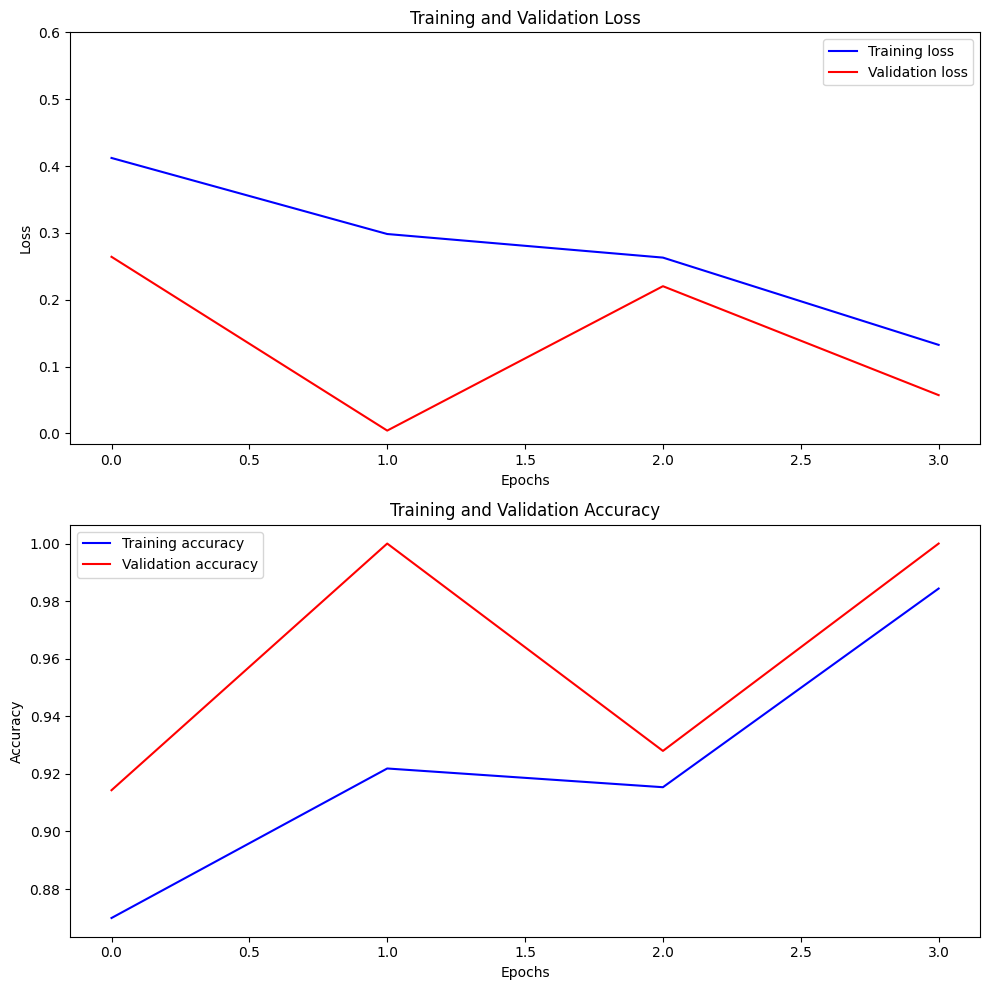

Found 5570 validated image filenames belonging to 6 classes.
  22/5570 ━━━━━━━━━━━━━━━━━━━━ 42s 8ms/step - categorical_accuracy: 0.7821 - loss: 0.3867

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5570/5570 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - categorical_accuracy: 0.9117 - loss: 0.2803
Accuracy on test set = 90.9 %
{0: 'glass', 1: 'metal', 2: 'organic', 3: 'paper', 4: 'plastic', 5: 'trash'}
5570/5570 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step
              precision    recall  f1-score   support

       glass       0.90      0.92      0.91       881
       metal       0.85      0.83      0.84       539
     organic       0.93      0.96      0.94      1500
       paper       0.91      0.93      0.92      1250
     plastic       0.82      0.78      0.80       531
       trash       0.97      0.91      0.94       869

    accuracy                           0.91      5570
   macro avg       0.90      0.89      0.89      5570
weighted avg       0.91      0.91      0.91      5570



In [4]:

import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot loss
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="Validation loss")
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_yticks(np.arange(0, 0.7, 0.1))
ax1.legend()

# Plot accuracy
ax2.plot(history.history['categorical_accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_categorical_accuracy'], color='r', label="Validation accuracy")
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

# Evaluation
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=1,
    shuffle=False
)

filenames = test_generator.filenames
nb_samples = len(filenames)

results = model.evaluate(test_generator, steps=nb_samples)
accuracy = results[1]
print('Accuracy on test set =', round((accuracy * 100), 2), '%')

# Predictions
gen_label_map = test_generator.class_indices
gen_label_map = dict((v, k) for k, v in gen_label_map.items())
print(gen_label_map)

preds = model.predict(test_generator, nb_samples)
preds = preds.argmax(1)
preds = [gen_label_map[item] for item in preds]

labels = test_df['category'].to_numpy()
print(classification_report(labels, preds))

Found 1 validated image filenames.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
['organic']


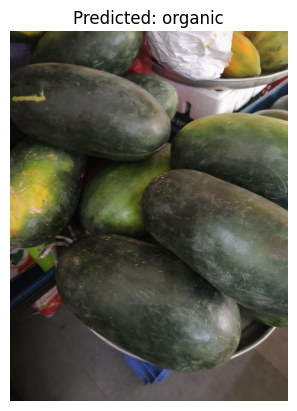

In [5]:
# for predicting selected images 

from tensorflow.keras.models import load_model
from PIL import Image
import matplotlib.pyplot as plt
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle
loaded_model = pickle.load(open(filename, 'rb'))
# Define constants and paths
IMAGE_SIZE = (320, 320)  # Same as in the model definition

# Prepare the test DataFrame
test_df1 = pd.DataFrame({'filename': ['organic13.jpeg']})
base_path1 = '/kaggle/input/test-hundred/test100/organic'

# Data generator for test image
test_datagen1 = ImageDataGenerator()
test_generator1 = test_datagen1.flow_from_dataframe(
    dataframe=test_df1,
    directory=base_path1,
    x_col='filename',
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    class_mode=None,
    batch_size=1,
    shuffle=False
)


nb_samples1 = 1
# Predict
preds1 = model.predict(test_generator1, nb_samples1)

# Get the category with the highest predicted probability, the prediction is only the category's number and not name
preds1 = preds1.argmax(1)

# Convert the predicted category's number to name 
preds1 = [gen_label_map[item] for item in preds1]
print(preds1)
image_path = os.path.join(base_path1, test_df1['filename'].iloc[0])
test_image = Image.open(image_path)

# Display the image with the prediction as the title
plt.imshow(test_image)
plt.title(f'Predicted: {preds1[0]}')
plt.axis('off')  # Turn off axis
plt.show()

In [6]:
# category wise accuracy
import numpy as np
# Predictions
preds = model.predict(test_generator, steps=nb_samples)
preds = preds.argmax(1)

# Mapping the predictions to category names
predicted_categories = [gen_label_map[pred] for pred in preds]

# True labels
true_categories = test_df['category'].tolist()

# Calculate accuracy for each class
category_accuracies = {}
for category in categories.values():
    # Get indices for the current category
    indices = [i for i, x in enumerate(true_categories) if x == category]
    
    # Calculate number of correct predictions for the current category
    correct_predictions = sum(1 for i in indices if predicted_categories[i] == category)
    
    # Calculate accuracy
    category_accuracies[category] = correct_predictions / len(indices)

# Display accuracies
for category, accuracy in category_accuracies.items():
    print(f"Accuracy for category '{category}': {accuracy:.2f}")

5570/5570 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step
Accuracy for category 'paper': 0.93
Accuracy for category 'plastic': 0.78
Accuracy for category 'metal': 0.83
Accuracy for category 'glass': 0.92
Accuracy for category 'organic': 0.96
Accuracy for category 'trash': 0.91


In [7]:
# measuring accuracy on a test datasetfrom tensorflow.keras.models import load_model
import pandas as pd
import os
import re
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
main_path = '/kaggle/input/test-hundred/test100/'
categories = {0: 'paper', 1: 'plastic', 2: 'metal', 3: 'glass', 4: 'organic', 5: 'trash'}

test_files_list=[]
test_categories_list=[]

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[:re.search("\d",x).start()] + '/' + x)
    return df

for category in categories:
    filenames = os.listdir(main_path + categories[category])
    test_files_list = test_files_list  + filenames
    test_categories_list = test_categories_list + [category] * len(filenames)
test_df = pd.DataFrame({
    'filename': test_files_list,
    
    'category': test_categories_list
})
test_df = add_class_name_prefix(test_df, 'filename')
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_df["category"] = test_df["category"].replace(categories) 

test1_datagen = ImageDataGenerator()

test1_generator = test1_datagen.flow_from_dataframe(
    dataframe= test_df,
    directory=main_path,
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    color_mode="rgb",
    class_mode="categorical",
    batch_size=1,
    shuffle=False 
)

filenames1 = test1_generator.filenames
nb_samples2 = len(filenames1)

results1 = loaded_model.evaluate(test1_generator, steps=nb_samples2)
accuracy2 = results1[1]

print('accuracy on real test set = ',  round((accuracy2 * 100),2 ), '% ')

Found 99 validated image filenames belonging to 6 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - categorical_accuracy: 0.6953 - loss: 0.8399
accuracy on real test set =  64.65 % 
